# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

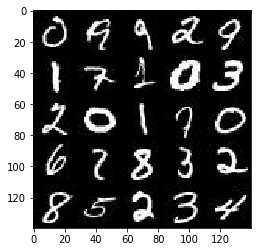

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

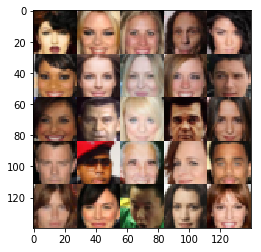

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    real=tf.placeholder(tf.float32,(None,image_width, image_height, image_channels),"real1")
    z_input=tf.placeholder(tf.float32,(None,z_dim),"fake1")
    learning_rate = tf.placeholder(tf.float32, name="lr")
    return real,z_input,learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha=0.2
    keep_prob=0.25
    with tf.variable_scope('discriminator', reuse=reuse):
       # x1 = tf.layers.conv2d(images, 64, 1, strides=1, padding='same', activation=None)
       # x1 = tf.layers.batch_normalization(x1, training=True)
       # x1 = tf.maximum(alpha * x1, x1)
        x2 = tf.layers.conv2d(images, 64, 3, strides=1, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x3 = tf.layers.conv2d(x2, 64, 5, strides=1, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        
        pool1 = tf.layers.max_pooling2d(inputs=x3, pool_size=[2, 2], strides=2)
       # x4 = tf.layers.conv2d(pool1, 128, 1, strides=1, padding='same', activation=None)
       # x4 = tf.layers.batch_normalization(x4, training=True)
       # x4 = tf.maximum(alpha * x4, x4)
        x5 = tf.layers.conv2d(pool1, 128, 3, strides=1, padding='same', activation=None)
        x5 = tf.layers.batch_normalization(x5, training=True)
        x5 = tf.maximum(alpha * x5, x5)
        x6 = tf.layers.conv2d(x5, 128, 5, strides=1, padding='same', activation=None)
        x6 = tf.layers.batch_normalization(x6, training=True)
        x6 = tf.maximum(alpha * x6, x6)
        
        pool2 = tf.layers.max_pooling2d(inputs=x6, pool_size=[2, 2], strides=2)
    #    x7 = tf.layers.conv2d(pool2, 256, 1, strides=1, padding='same', activation=None)
     #   x7 = tf.layers.batch_normalization(x7, training=True)
      #  x7 = tf.maximum(alpha * x7, x7)
        x8 = tf.layers.conv2d(pool2, 512, 3, strides=1, padding='same', activation=None)
        x8 = tf.layers.batch_normalization(x8, training=True)
        x8 = tf.maximum(alpha * x8, x8)
        x9 = tf.layers.conv2d(x8, 512, 5, strides=1, padding='same', activation=None)
        x9 = tf.layers.batch_normalization(x9, training=True)
        x9 = tf.maximum(alpha * x9, x9)
        
        pool3 = tf.layers.max_pooling2d(inputs=x8, pool_size=[2, 2], strides=2)
        flat = tf.reshape(pool3, (-1,  4 * 4 * 256))
        flat2=tf.layers.dense(flat, 1024)
        flat2=tf.nn.dropout(flat2, keep_prob=keep_prob)
        logits = tf.layers.dense(flat2, 1)
        out = tf.sigmoid(logits)
        
        return out, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    keep_prob = 0.25
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*1024)
        x1 = tf.reshape(x1, (-1, 7, 7, 1024))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x2 = tf.layers.conv2d_transpose(x1, 256, 1, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x3 = tf.layers.conv2d(x2, 256, 3, strides=1, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x4 = tf.layers.conv2d(x3, 256, 5, strides=1, padding='same', activation=None)
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        x4=x4+x2
        x5 = tf.layers.conv2d_transpose(x4, 128, 1, strides=2, padding='same', activation=None)
        x5 = tf.layers.batch_normalization(x5, training=is_train)
        x5 = tf.maximum(alpha * x5, x5)
        x6 = tf.layers.conv2d(x5, 128, 3, strides=1, padding='same', activation=None)
        x6 = tf.layers.batch_normalization(x6, training=is_train)
        x6 = tf.maximum(alpha * x6, x6)
        x7 = tf.layers.conv2d(x6, 128, 5, strides=1, padding='same', activation=None)
        x7 = tf.layers.batch_normalization(x6, training=is_train)
        x7 = tf.maximum(alpha * x7, x7)
        x7=x7+x5
       # x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        logits = tf.layers.conv2d_transpose(x7, out_channel_dim, 3, strides=1, padding='same', activation=None)
        out = tf.tanh(logits)
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, output_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    smooth=.9
    g_model = generator(input_z, output_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    disc_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    disc_opt, gen_opt = model_opt(disc_loss, gen_loss, lr, beta1)

    
    saver = tf.train.Saver()
    losses = []
    steps = 0
    total_steps = epoch_count * batch_size

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(
                    disc_opt, 
                    feed_dict={
                        input_real: batch_images, input_z: batch_z, lr: learning_rate 
                    }
                )
                _ = sess.run(
                    gen_opt, 
                    feed_dict={
                        input_real: batch_images, 
                        input_z: batch_z, 
                        lr:learning_rate
                    }
                )
                if steps == 1:
                    print('initial output:')
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = disc_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = gen_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                            "Generator Loss: {:.4f}".format(train_loss_g),
                            "Discriminator Loss: {:.4f}...".format(train_loss_d))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    

        saver.save(sess, './generator.ckpt')
                
    return losses

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

initial output:


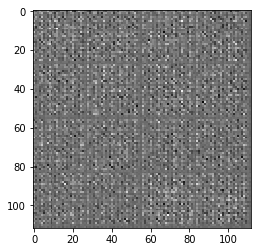

Epoch 1/2... Generator Loss: 3.1825 Discriminator Loss: 0.9094...
Epoch 1/2... Generator Loss: 1.1886 Discriminator Loss: 3.0841...
Epoch 1/2... Generator Loss: 5.4034 Discriminator Loss: 1.8087...
Epoch 1/2... Generator Loss: 8.0451 Discriminator Loss: 4.1376...
Epoch 1/2... Generator Loss: 4.2431 Discriminator Loss: 1.9072...
Epoch 1/2... Generator Loss: 3.2178 Discriminator Loss: 0.5607...
Epoch 1/2... Generator Loss: 3.9849 Discriminator Loss: 2.0025...
Epoch 1/2... Generator Loss: 3.0797 Discriminator Loss: 0.3353...
Epoch 1/2... Generator Loss: 4.0277 Discriminator Loss: 0.0608...
Epoch 1/2... Generator Loss: 7.2238 Discriminator Loss: 3.1285...


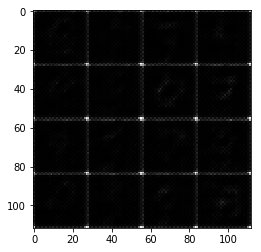

Epoch 1/2... Generator Loss: 2.3348 Discriminator Loss: 1.0551...
Epoch 1/2... Generator Loss: 5.6961 Discriminator Loss: 1.0116...
Epoch 1/2... Generator Loss: 0.2725 Discriminator Loss: 2.0588...
Epoch 1/2... Generator Loss: 1.1336 Discriminator Loss: 0.7891...
Epoch 1/2... Generator Loss: 1.2381 Discriminator Loss: 0.8615...
Epoch 1/2... Generator Loss: 0.4607 Discriminator Loss: 1.5132...
Epoch 1/2... Generator Loss: 0.7380 Discriminator Loss: 0.9335...
Epoch 1/2... Generator Loss: 1.3111 Discriminator Loss: 0.6058...
Epoch 1/2... Generator Loss: 1.4926 Discriminator Loss: 1.0903...
Epoch 1/2... Generator Loss: 0.4965 Discriminator Loss: 1.2293...


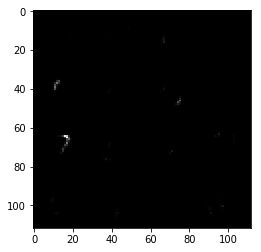

Epoch 1/2... Generator Loss: 1.4820 Discriminator Loss: 0.3795...
Epoch 1/2... Generator Loss: 0.8140 Discriminator Loss: 1.0423...
Epoch 1/2... Generator Loss: 1.7249 Discriminator Loss: 0.9631...
Epoch 1/2... Generator Loss: 1.2333 Discriminator Loss: 0.5081...
Epoch 1/2... Generator Loss: 1.7880 Discriminator Loss: 1.0993...
Epoch 1/2... Generator Loss: 0.7369 Discriminator Loss: 1.0644...
Epoch 1/2... Generator Loss: 0.7069 Discriminator Loss: 0.9780...
Epoch 1/2... Generator Loss: 0.7773 Discriminator Loss: 1.0721...
Epoch 1/2... Generator Loss: 1.6266 Discriminator Loss: 0.7673...
Epoch 1/2... Generator Loss: 3.7872 Discriminator Loss: 1.3344...


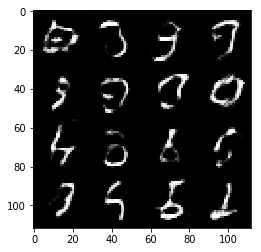

Epoch 1/2... Generator Loss: 1.0598 Discriminator Loss: 0.9379...
Epoch 1/2... Generator Loss: 2.3092 Discriminator Loss: 0.9629...
Epoch 1/2... Generator Loss: 0.4230 Discriminator Loss: 1.4426...
Epoch 1/2... Generator Loss: 1.0645 Discriminator Loss: 0.8305...
Epoch 1/2... Generator Loss: 0.7546 Discriminator Loss: 1.0282...
Epoch 1/2... Generator Loss: 1.0764 Discriminator Loss: 0.7565...
Epoch 1/2... Generator Loss: 0.8669 Discriminator Loss: 1.1871...
Epoch 1/2... Generator Loss: 0.8660 Discriminator Loss: 0.9209...
Epoch 1/2... Generator Loss: 1.5734 Discriminator Loss: 0.6314...
Epoch 1/2... Generator Loss: 2.1371 Discriminator Loss: 0.8781...


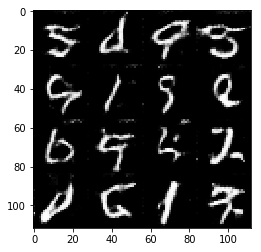

Epoch 1/2... Generator Loss: 0.1325 Discriminator Loss: 2.5604...
Epoch 1/2... Generator Loss: 1.1631 Discriminator Loss: 0.5602...
Epoch 1/2... Generator Loss: 2.0269 Discriminator Loss: 0.3112...
Epoch 1/2... Generator Loss: 0.4658 Discriminator Loss: 1.4751...
Epoch 1/2... Generator Loss: 1.3708 Discriminator Loss: 0.6601...
Epoch 1/2... Generator Loss: 0.2416 Discriminator Loss: 2.2273...
Epoch 1/2... Generator Loss: 0.9602 Discriminator Loss: 0.9335...
Epoch 1/2... Generator Loss: 0.8526 Discriminator Loss: 0.9759...
Epoch 1/2... Generator Loss: 0.7131 Discriminator Loss: 1.1279...
Epoch 1/2... Generator Loss: 1.3964 Discriminator Loss: 0.7118...


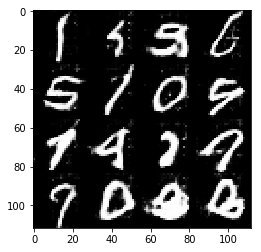

Epoch 1/2... Generator Loss: 4.2167 Discriminator Loss: 0.6352...
Epoch 1/2... Generator Loss: 0.5806 Discriminator Loss: 1.2850...
Epoch 1/2... Generator Loss: 1.7004 Discriminator Loss: 0.7021...
Epoch 1/2... Generator Loss: 1.5005 Discriminator Loss: 0.6847...
Epoch 1/2... Generator Loss: 1.2355 Discriminator Loss: 0.5996...
Epoch 1/2... Generator Loss: 1.8470 Discriminator Loss: 0.3895...
Epoch 1/2... Generator Loss: 0.1848 Discriminator Loss: 2.5205...
Epoch 1/2... Generator Loss: 0.7572 Discriminator Loss: 1.1124...
Epoch 1/2... Generator Loss: 1.4036 Discriminator Loss: 1.0403...
Epoch 1/2... Generator Loss: 0.4573 Discriminator Loss: 1.3713...


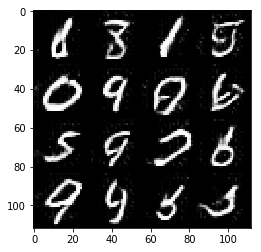

Epoch 1/2... Generator Loss: 1.9252 Discriminator Loss: 1.2695...
Epoch 1/2... Generator Loss: 1.0304 Discriminator Loss: 0.9157...
Epoch 1/2... Generator Loss: 0.7816 Discriminator Loss: 0.9990...
Epoch 1/2... Generator Loss: 1.0786 Discriminator Loss: 0.9183...
Epoch 1/2... Generator Loss: 2.5055 Discriminator Loss: 1.3320...
Epoch 1/2... Generator Loss: 0.5673 Discriminator Loss: 1.0790...
Epoch 1/2... Generator Loss: 1.3300 Discriminator Loss: 0.8557...
Epoch 1/2... Generator Loss: 0.6244 Discriminator Loss: 1.1719...
Epoch 1/2... Generator Loss: 1.0477 Discriminator Loss: 0.9482...
Epoch 1/2... Generator Loss: 1.5499 Discriminator Loss: 1.0642...


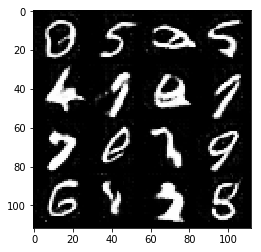

Epoch 1/2... Generator Loss: 2.0036 Discriminator Loss: 0.7542...
Epoch 1/2... Generator Loss: 0.7485 Discriminator Loss: 1.0453...
Epoch 1/2... Generator Loss: 0.4436 Discriminator Loss: 1.4575...
Epoch 1/2... Generator Loss: 0.9042 Discriminator Loss: 1.0035...
Epoch 1/2... Generator Loss: 2.0558 Discriminator Loss: 0.8139...
Epoch 1/2... Generator Loss: 0.6487 Discriminator Loss: 1.0974...
Epoch 1/2... Generator Loss: 1.0909 Discriminator Loss: 0.7279...
Epoch 1/2... Generator Loss: 0.2636 Discriminator Loss: 1.9620...
Epoch 1/2... Generator Loss: 0.9615 Discriminator Loss: 0.9106...
Epoch 1/2... Generator Loss: 0.7763 Discriminator Loss: 1.0418...


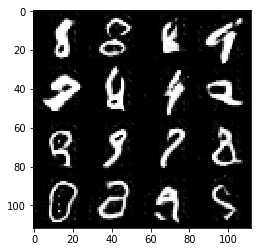

Epoch 1/2... Generator Loss: 1.1449 Discriminator Loss: 0.6992...
Epoch 1/2... Generator Loss: 1.7673 Discriminator Loss: 0.5570...
Epoch 1/2... Generator Loss: 1.4811 Discriminator Loss: 0.6109...
Epoch 1/2... Generator Loss: 0.1657 Discriminator Loss: 2.5167...
Epoch 1/2... Generator Loss: 0.4258 Discriminator Loss: 1.4388...
Epoch 1/2... Generator Loss: 0.4151 Discriminator Loss: 1.4856...
Epoch 1/2... Generator Loss: 1.5741 Discriminator Loss: 0.7974...
Epoch 1/2... Generator Loss: 0.8045 Discriminator Loss: 0.9224...
Epoch 1/2... Generator Loss: 2.2607 Discriminator Loss: 0.3160...
Epoch 1/2... Generator Loss: 2.6939 Discriminator Loss: 0.4834...


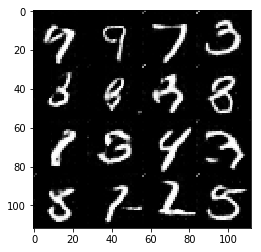

Epoch 1/2... Generator Loss: 1.0443 Discriminator Loss: 1.1462...
Epoch 1/2... Generator Loss: 2.4203 Discriminator Loss: 0.6843...
Epoch 1/2... Generator Loss: 1.1925 Discriminator Loss: 0.9423...
Epoch 2/2... Generator Loss: 0.4389 Discriminator Loss: 1.3674...
Epoch 2/2... Generator Loss: 1.8553 Discriminator Loss: 0.7475...
Epoch 2/2... Generator Loss: 0.6304 Discriminator Loss: 1.2285...
Epoch 2/2... Generator Loss: 0.8495 Discriminator Loss: 0.9233...
Epoch 2/2... Generator Loss: 1.3003 Discriminator Loss: 0.8090...
Epoch 2/2... Generator Loss: 2.0756 Discriminator Loss: 0.5731...
Epoch 2/2... Generator Loss: 1.6509 Discriminator Loss: 0.7711...


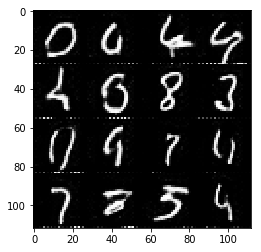

Epoch 2/2... Generator Loss: 0.4147 Discriminator Loss: 1.6582...
Epoch 2/2... Generator Loss: 0.4051 Discriminator Loss: 1.6219...
Epoch 2/2... Generator Loss: 0.9389 Discriminator Loss: 0.8524...
Epoch 2/2... Generator Loss: 0.8184 Discriminator Loss: 0.9690...
Epoch 2/2... Generator Loss: 1.3322 Discriminator Loss: 0.6769...
Epoch 2/2... Generator Loss: 1.2242 Discriminator Loss: 0.6138...
Epoch 2/2... Generator Loss: 0.8305 Discriminator Loss: 0.9327...
Epoch 2/2... Generator Loss: 5.2597 Discriminator Loss: 3.1685...
Epoch 2/2... Generator Loss: 1.4376 Discriminator Loss: 0.6589...
Epoch 2/2... Generator Loss: 0.5095 Discriminator Loss: 1.2517...


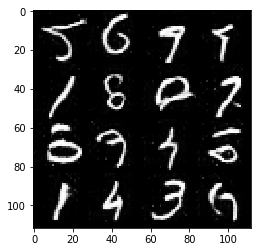

Epoch 2/2... Generator Loss: 2.4003 Discriminator Loss: 0.5886...
Epoch 2/2... Generator Loss: 0.4032 Discriminator Loss: 1.4867...
Epoch 2/2... Generator Loss: 1.0932 Discriminator Loss: 0.8478...
Epoch 2/2... Generator Loss: 2.4660 Discriminator Loss: 1.4417...
Epoch 2/2... Generator Loss: 2.2892 Discriminator Loss: 0.8896...
Epoch 2/2... Generator Loss: 0.8189 Discriminator Loss: 1.0178...
Epoch 2/2... Generator Loss: 5.1456 Discriminator Loss: 2.7709...
Epoch 2/2... Generator Loss: 1.8630 Discriminator Loss: 0.6522...
Epoch 2/2... Generator Loss: 0.9713 Discriminator Loss: 0.8742...
Epoch 2/2... Generator Loss: 1.2403 Discriminator Loss: 0.5830...


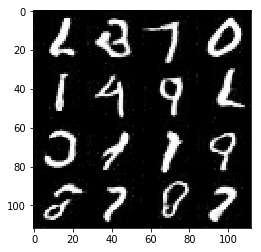

Epoch 2/2... Generator Loss: 1.3875 Discriminator Loss: 0.6492...
Epoch 2/2... Generator Loss: 0.7769 Discriminator Loss: 1.0374...
Epoch 2/2... Generator Loss: 2.6976 Discriminator Loss: 0.9836...
Epoch 2/2... Generator Loss: 1.8799 Discriminator Loss: 0.6441...
Epoch 2/2... Generator Loss: 1.2243 Discriminator Loss: 0.7788...
Epoch 2/2... Generator Loss: 1.6576 Discriminator Loss: 0.6058...
Epoch 2/2... Generator Loss: 2.4031 Discriminator Loss: 0.5145...
Epoch 2/2... Generator Loss: 1.1575 Discriminator Loss: 0.7393...
Epoch 2/2... Generator Loss: 2.9736 Discriminator Loss: 0.7767...
Epoch 2/2... Generator Loss: 1.3589 Discriminator Loss: 0.5649...


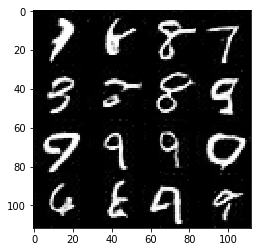

Epoch 2/2... Generator Loss: 1.3067 Discriminator Loss: 0.7013...
Epoch 2/2... Generator Loss: 1.1069 Discriminator Loss: 1.0079...
Epoch 2/2... Generator Loss: 0.8963 Discriminator Loss: 0.9499...
Epoch 2/2... Generator Loss: 1.3066 Discriminator Loss: 0.7593...
Epoch 2/2... Generator Loss: 1.5347 Discriminator Loss: 0.6278...
Epoch 2/2... Generator Loss: 0.4865 Discriminator Loss: 1.4907...
Epoch 2/2... Generator Loss: 2.2864 Discriminator Loss: 0.8404...
Epoch 2/2... Generator Loss: 1.2713 Discriminator Loss: 0.7694...
Epoch 2/2... Generator Loss: 2.7070 Discriminator Loss: 1.0450...
Epoch 2/2... Generator Loss: 1.3920 Discriminator Loss: 0.7018...


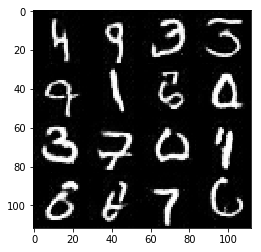

Epoch 2/2... Generator Loss: 2.0352 Discriminator Loss: 0.7768...
Epoch 2/2... Generator Loss: 0.6312 Discriminator Loss: 1.2491...
Epoch 2/2... Generator Loss: 2.7490 Discriminator Loss: 0.6599...
Epoch 2/2... Generator Loss: 0.7322 Discriminator Loss: 1.1356...
Epoch 2/2... Generator Loss: 0.4624 Discriminator Loss: 1.4537...
Epoch 2/2... Generator Loss: 0.2569 Discriminator Loss: 2.3940...
Epoch 2/2... Generator Loss: 1.5872 Discriminator Loss: 0.6057...
Epoch 2/2... Generator Loss: 0.6688 Discriminator Loss: 1.1438...
Epoch 2/2... Generator Loss: 0.9070 Discriminator Loss: 0.8810...
Epoch 2/2... Generator Loss: 0.4277 Discriminator Loss: 1.5697...


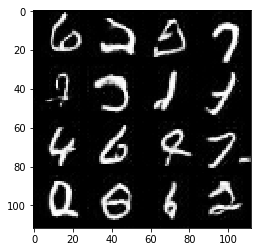

Epoch 2/2... Generator Loss: 0.2872 Discriminator Loss: 1.9194...
Epoch 2/2... Generator Loss: 1.5620 Discriminator Loss: 0.5726...
Epoch 2/2... Generator Loss: 0.4442 Discriminator Loss: 1.5011...
Epoch 2/2... Generator Loss: 1.8894 Discriminator Loss: 0.4214...
Epoch 2/2... Generator Loss: 0.7507 Discriminator Loss: 1.1420...
Epoch 2/2... Generator Loss: 3.0494 Discriminator Loss: 1.6491...
Epoch 2/2... Generator Loss: 1.2059 Discriminator Loss: 0.7320...
Epoch 2/2... Generator Loss: 0.7601 Discriminator Loss: 0.9656...
Epoch 2/2... Generator Loss: 3.9748 Discriminator Loss: 1.4779...
Epoch 2/2... Generator Loss: 1.2205 Discriminator Loss: 0.6953...


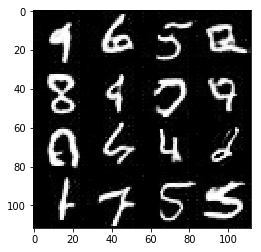

Epoch 2/2... Generator Loss: 0.8818 Discriminator Loss: 0.9421...
Epoch 2/2... Generator Loss: 0.1104 Discriminator Loss: 2.8773...
Epoch 2/2... Generator Loss: 1.4235 Discriminator Loss: 0.6569...
Epoch 2/2... Generator Loss: 1.3243 Discriminator Loss: 0.5598...
Epoch 2/2... Generator Loss: 0.6105 Discriminator Loss: 1.2773...
Epoch 2/2... Generator Loss: 3.0261 Discriminator Loss: 0.6963...
Epoch 2/2... Generator Loss: 2.5527 Discriminator Loss: 0.5793...
Epoch 2/2... Generator Loss: 1.7742 Discriminator Loss: 0.7180...
Epoch 2/2... Generator Loss: 2.1887 Discriminator Loss: 0.5006...
Epoch 2/2... Generator Loss: 1.7244 Discriminator Loss: 0.4412...


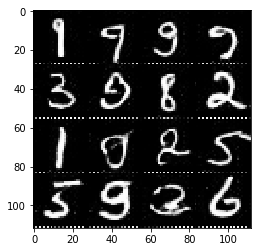

Epoch 2/2... Generator Loss: 3.5602 Discriminator Loss: 0.1596...
Epoch 2/2... Generator Loss: 2.2967 Discriminator Loss: 0.3429...
Epoch 2/2... Generator Loss: 0.9502 Discriminator Loss: 0.8551...
Epoch 2/2... Generator Loss: 1.4239 Discriminator Loss: 0.8470...
Epoch 2/2... Generator Loss: 1.2753 Discriminator Loss: 0.7339...
Epoch 2/2... Generator Loss: 1.9608 Discriminator Loss: 0.5109...
Epoch 2/2... Generator Loss: 3.7053 Discriminator Loss: 0.8743...
Epoch 2/2... Generator Loss: 1.2589 Discriminator Loss: 0.6677...
Epoch 2/2... Generator Loss: 2.3460 Discriminator Loss: 0.3218...
Epoch 2/2... Generator Loss: 1.4610 Discriminator Loss: 0.5394...


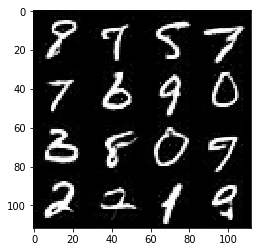

Epoch 2/2... Generator Loss: 5.1379 Discriminator Loss: 1.0108...
Epoch 2/2... Generator Loss: 0.8786 Discriminator Loss: 1.0176...
Epoch 2/2... Generator Loss: 0.7752 Discriminator Loss: 1.0301...
Epoch 2/2... Generator Loss: 1.1461 Discriminator Loss: 0.7415...
Epoch 2/2... Generator Loss: 1.3067 Discriminator Loss: 0.6972...
Epoch 2/2... Generator Loss: 1.2464 Discriminator Loss: 0.6118...
Epoch 2/2... Generator Loss: 3.2144 Discriminator Loss: 0.6495...


In [15]:
batch_size =64
z_dim = 100
learning_rate = .0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

initial output:


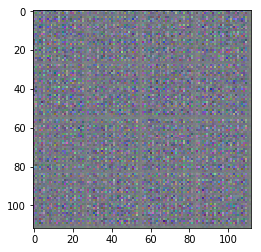

Epoch 1/1... Generator Loss: 2.4437 Discriminator Loss: 1.3154...
Epoch 1/1... Generator Loss: 3.6794 Discriminator Loss: 0.3796...
Epoch 1/1... Generator Loss: 3.9863 Discriminator Loss: 0.5393...
Epoch 1/1... Generator Loss: 5.7733 Discriminator Loss: 0.2247...
Epoch 1/1... Generator Loss: 5.1707 Discriminator Loss: 0.0831...
Epoch 1/1... Generator Loss: 7.5481 Discriminator Loss: 0.0633...
Epoch 1/1... Generator Loss: 7.4129 Discriminator Loss: 0.1685...
Epoch 1/1... Generator Loss: 18.6446 Discriminator Loss: 1.8768...
Epoch 1/1... Generator Loss: 7.5268 Discriminator Loss: 0.3747...
Epoch 1/1... Generator Loss: 4.8617 Discriminator Loss: 0.3508...


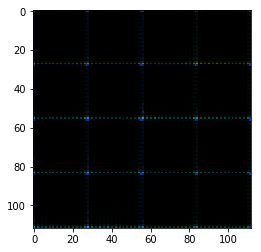

Epoch 1/1... Generator Loss: 6.0117 Discriminator Loss: 0.1283...
Epoch 1/1... Generator Loss: 8.0832 Discriminator Loss: 0.0287...
Epoch 1/1... Generator Loss: 7.6119 Discriminator Loss: 0.0134...
Epoch 1/1... Generator Loss: 0.0859 Discriminator Loss: 6.4444...
Epoch 1/1... Generator Loss: 6.0585 Discriminator Loss: 0.3546...
Epoch 1/1... Generator Loss: 17.1151 Discriminator Loss: 0.0108...
Epoch 1/1... Generator Loss: 14.8969 Discriminator Loss: 0.0053...
Epoch 1/1... Generator Loss: 10.0838 Discriminator Loss: 0.0218...
Epoch 1/1... Generator Loss: 10.2845 Discriminator Loss: 0.0075...
Epoch 1/1... Generator Loss: 12.5370 Discriminator Loss: 0.0003...


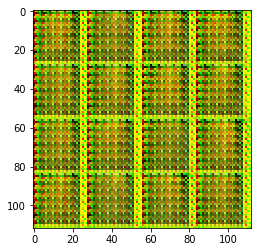

Epoch 1/1... Generator Loss: 9.0891 Discriminator Loss: 0.0045...
Epoch 1/1... Generator Loss: 8.0931 Discriminator Loss: 0.0166...
Epoch 1/1... Generator Loss: 8.5896 Discriminator Loss: 0.0121...
Epoch 1/1... Generator Loss: 9.5944 Discriminator Loss: 0.0041...
Epoch 1/1... Generator Loss: 8.7364 Discriminator Loss: 0.0060...
Epoch 1/1... Generator Loss: 12.5914 Discriminator Loss: 0.0009...
Epoch 1/1... Generator Loss: 10.8101 Discriminator Loss: 0.0007...
Epoch 1/1... Generator Loss: 12.1432 Discriminator Loss: 0.0013...
Epoch 1/1... Generator Loss: 9.7732 Discriminator Loss: 0.0010...
Epoch 1/1... Generator Loss: 13.1716 Discriminator Loss: 0.0002...


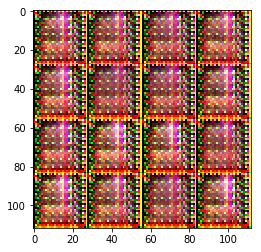

Epoch 1/1... Generator Loss: 11.7543 Discriminator Loss: 0.0095...
Epoch 1/1... Generator Loss: 13.4180 Discriminator Loss: 0.0052...
Epoch 1/1... Generator Loss: 9.9384 Discriminator Loss: 0.0007...
Epoch 1/1... Generator Loss: 10.4562 Discriminator Loss: 0.0045...
Epoch 1/1... Generator Loss: 10.6018 Discriminator Loss: 0.0047...
Epoch 1/1... Generator Loss: 9.9620 Discriminator Loss: 0.0016...
Epoch 1/1... Generator Loss: 12.0488 Discriminator Loss: 0.0010...
Epoch 1/1... Generator Loss: 10.9292 Discriminator Loss: 0.0008...
Epoch 1/1... Generator Loss: 11.2948 Discriminator Loss: 0.0005...
Epoch 1/1... Generator Loss: 10.7773 Discriminator Loss: 0.0005...


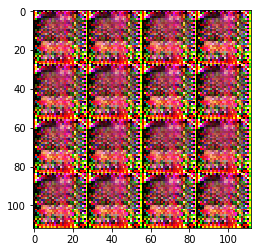

Epoch 1/1... Generator Loss: 11.0651 Discriminator Loss: 0.0002...
Epoch 1/1... Generator Loss: 10.5904 Discriminator Loss: 0.0065...
Epoch 1/1... Generator Loss: 11.5702 Discriminator Loss: 0.0002...
Epoch 1/1... Generator Loss: 12.3608 Discriminator Loss: 0.0000...
Epoch 1/1... Generator Loss: 10.4868 Discriminator Loss: 0.0019...
Epoch 1/1... Generator Loss: 11.7299 Discriminator Loss: 0.0002...
Epoch 1/1... Generator Loss: 10.7165 Discriminator Loss: 0.0011...
Epoch 1/1... Generator Loss: 10.8200 Discriminator Loss: 0.0009...
Epoch 1/1... Generator Loss: 7.2852 Discriminator Loss: 0.0039...
Epoch 1/1... Generator Loss: 4.0151 Discriminator Loss: 0.1989...


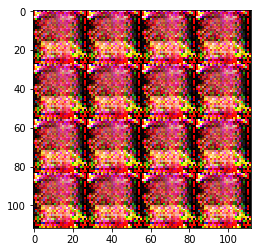

Epoch 1/1... Generator Loss: 5.5639 Discriminator Loss: 0.1104...
Epoch 1/1... Generator Loss: 10.6360 Discriminator Loss: 1.5933...
Epoch 1/1... Generator Loss: 9.3804 Discriminator Loss: 0.4709...
Epoch 1/1... Generator Loss: 6.2066 Discriminator Loss: 0.0909...
Epoch 1/1... Generator Loss: 4.6767 Discriminator Loss: 0.0828...
Epoch 1/1... Generator Loss: 5.3109 Discriminator Loss: 0.0464...
Epoch 1/1... Generator Loss: 5.2349 Discriminator Loss: 0.0498...
Epoch 1/1... Generator Loss: 7.0902 Discriminator Loss: 0.0147...
Epoch 1/1... Generator Loss: 8.7268 Discriminator Loss: 0.0312...
Epoch 1/1... Generator Loss: 1.6204 Discriminator Loss: 3.9624...


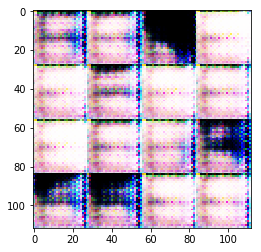

Epoch 1/1... Generator Loss: 9.0826 Discriminator Loss: 0.0354...
Epoch 1/1... Generator Loss: 7.9341 Discriminator Loss: 0.0601...
Epoch 1/1... Generator Loss: 19.2761 Discriminator Loss: 6.7571...
Epoch 1/1... Generator Loss: 10.0241 Discriminator Loss: 0.0004...
Epoch 1/1... Generator Loss: 2.1414 Discriminator Loss: 0.7810...
Epoch 1/1... Generator Loss: 3.3694 Discriminator Loss: 0.4000...
Epoch 1/1... Generator Loss: 8.7225 Discriminator Loss: 1.3784...
Epoch 1/1... Generator Loss: 5.0201 Discriminator Loss: 0.1075...
Epoch 1/1... Generator Loss: 4.8938 Discriminator Loss: 0.4547...
Epoch 1/1... Generator Loss: 14.8606 Discriminator Loss: 1.3354...


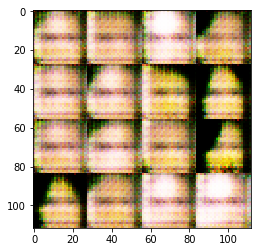

Epoch 1/1... Generator Loss: 0.2264 Discriminator Loss: 3.0481...
Epoch 1/1... Generator Loss: 7.0371 Discriminator Loss: 0.0318...
Epoch 1/1... Generator Loss: 6.6462 Discriminator Loss: 0.1010...
Epoch 1/1... Generator Loss: 8.0515 Discriminator Loss: 0.0125...
Epoch 1/1... Generator Loss: 6.9991 Discriminator Loss: 0.0233...
Epoch 1/1... Generator Loss: 7.0591 Discriminator Loss: 0.0161...
Epoch 1/1... Generator Loss: 0.7257 Discriminator Loss: 1.5621...
Epoch 1/1... Generator Loss: 6.0104 Discriminator Loss: 0.0163...
Epoch 1/1... Generator Loss: 1.9772 Discriminator Loss: 0.4644...
Epoch 1/1... Generator Loss: 1.4978 Discriminator Loss: 0.6407...


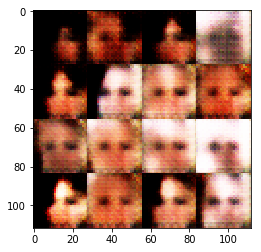

Epoch 1/1... Generator Loss: 11.7140 Discriminator Loss: 0.0019...
Epoch 1/1... Generator Loss: 11.3064 Discriminator Loss: 0.0178...
Epoch 1/1... Generator Loss: 3.9927 Discriminator Loss: 0.0743...
Epoch 1/1... Generator Loss: 11.7033 Discriminator Loss: 0.0037...
Epoch 1/1... Generator Loss: 7.1173 Discriminator Loss: 0.0163...
Epoch 1/1... Generator Loss: 2.9018 Discriminator Loss: 0.1924...
Epoch 1/1... Generator Loss: 18.0860 Discriminator Loss: 10.1336...
Epoch 1/1... Generator Loss: 0.6774 Discriminator Loss: 1.1381...
Epoch 1/1... Generator Loss: 2.1605 Discriminator Loss: 0.4469...
Epoch 1/1... Generator Loss: 1.4057 Discriminator Loss: 0.5584...


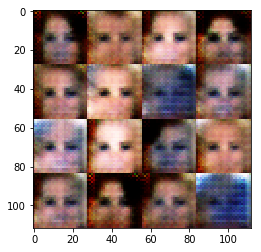

Epoch 1/1... Generator Loss: 4.5873 Discriminator Loss: 0.0878...
Epoch 1/1... Generator Loss: 4.2706 Discriminator Loss: 0.1113...
Epoch 1/1... Generator Loss: 4.3836 Discriminator Loss: 0.2233...
Epoch 1/1... Generator Loss: 1.4445 Discriminator Loss: 0.5789...
Epoch 1/1... Generator Loss: 3.4262 Discriminator Loss: 0.1111...
Epoch 1/1... Generator Loss: 6.4464 Discriminator Loss: 0.1272...
Epoch 1/1... Generator Loss: 3.9856 Discriminator Loss: 0.4802...
Epoch 1/1... Generator Loss: 4.8252 Discriminator Loss: 0.1833...
Epoch 1/1... Generator Loss: 3.3791 Discriminator Loss: 0.2195...
Epoch 1/1... Generator Loss: 2.7308 Discriminator Loss: 0.1792...


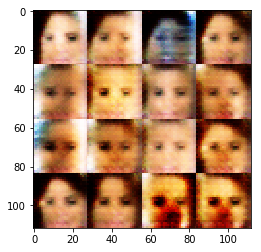

Epoch 1/1... Generator Loss: 4.6902 Discriminator Loss: 0.0408...
Epoch 1/1... Generator Loss: 4.9176 Discriminator Loss: 0.0501...
Epoch 1/1... Generator Loss: 9.0220 Discriminator Loss: 0.1156...
Epoch 1/1... Generator Loss: 6.6278 Discriminator Loss: 0.0338...
Epoch 1/1... Generator Loss: 7.3369 Discriminator Loss: 0.6721...
Epoch 1/1... Generator Loss: 5.3496 Discriminator Loss: 0.0209...
Epoch 1/1... Generator Loss: 7.2394 Discriminator Loss: 0.0054...
Epoch 1/1... Generator Loss: 4.0298 Discriminator Loss: 0.3947...
Epoch 1/1... Generator Loss: 1.5007 Discriminator Loss: 0.5175...
Epoch 1/1... Generator Loss: 3.4507 Discriminator Loss: 0.1732...


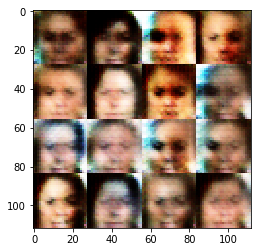

Epoch 1/1... Generator Loss: 3.1886 Discriminator Loss: 0.1742...
Epoch 1/1... Generator Loss: 0.5968 Discriminator Loss: 1.4258...
Epoch 1/1... Generator Loss: 2.7259 Discriminator Loss: 0.5937...
Epoch 1/1... Generator Loss: 2.4005 Discriminator Loss: 0.2502...
Epoch 1/1... Generator Loss: 2.8413 Discriminator Loss: 0.1790...
Epoch 1/1... Generator Loss: 1.9765 Discriminator Loss: 0.3236...
Epoch 1/1... Generator Loss: 5.6588 Discriminator Loss: 0.0337...
Epoch 1/1... Generator Loss: 1.3697 Discriminator Loss: 0.5369...
Epoch 1/1... Generator Loss: 2.8814 Discriminator Loss: 0.2629...
Epoch 1/1... Generator Loss: 4.6392 Discriminator Loss: 0.1810...


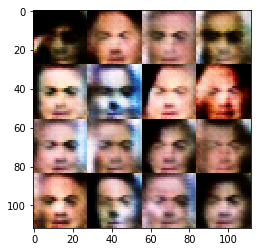

Epoch 1/1... Generator Loss: 0.2322 Discriminator Loss: 2.4393...
Epoch 1/1... Generator Loss: 3.0626 Discriminator Loss: 0.1218...
Epoch 1/1... Generator Loss: 2.3371 Discriminator Loss: 0.2321...
Epoch 1/1... Generator Loss: 4.5165 Discriminator Loss: 0.0516...
Epoch 1/1... Generator Loss: 4.8753 Discriminator Loss: 0.0403...
Epoch 1/1... Generator Loss: 2.9121 Discriminator Loss: 0.1569...
Epoch 1/1... Generator Loss: 5.1880 Discriminator Loss: 0.9988...
Epoch 1/1... Generator Loss: 2.2137 Discriminator Loss: 0.2497...
Epoch 1/1... Generator Loss: 4.6982 Discriminator Loss: 1.8871...
Epoch 1/1... Generator Loss: 1.7037 Discriminator Loss: 0.5005...


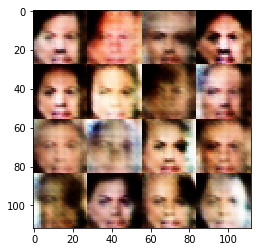

Epoch 1/1... Generator Loss: 1.1507 Discriminator Loss: 0.5270...
Epoch 1/1... Generator Loss: 4.2621 Discriminator Loss: 0.0626...
Epoch 1/1... Generator Loss: 4.8335 Discriminator Loss: 0.1463...
Epoch 1/1... Generator Loss: 2.8152 Discriminator Loss: 0.1232...
Epoch 1/1... Generator Loss: 0.0722 Discriminator Loss: 4.2898...
Epoch 1/1... Generator Loss: 1.5329 Discriminator Loss: 0.7144...
Epoch 1/1... Generator Loss: 1.7121 Discriminator Loss: 0.4470...
Epoch 1/1... Generator Loss: 1.9298 Discriminator Loss: 0.4561...
Epoch 1/1... Generator Loss: 1.7108 Discriminator Loss: 0.4201...
Epoch 1/1... Generator Loss: 3.5499 Discriminator Loss: 0.2567...


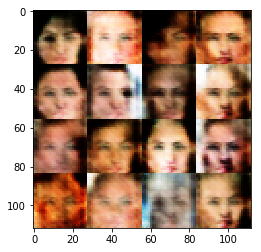

Epoch 1/1... Generator Loss: 2.1798 Discriminator Loss: 0.3290...
Epoch 1/1... Generator Loss: 1.2986 Discriminator Loss: 0.5216...
Epoch 1/1... Generator Loss: 3.0115 Discriminator Loss: 0.3112...
Epoch 1/1... Generator Loss: 0.8304 Discriminator Loss: 1.0135...
Epoch 1/1... Generator Loss: 3.6944 Discriminator Loss: 0.2595...
Epoch 1/1... Generator Loss: 0.3927 Discriminator Loss: 2.2827...
Epoch 1/1... Generator Loss: 1.8785 Discriminator Loss: 0.3903...
Epoch 1/1... Generator Loss: 2.0414 Discriminator Loss: 0.3390...
Epoch 1/1... Generator Loss: 2.0723 Discriminator Loss: 0.4363...
Epoch 1/1... Generator Loss: 1.5975 Discriminator Loss: 0.4521...


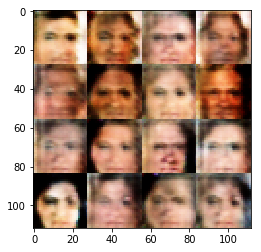

Epoch 1/1... Generator Loss: 2.6784 Discriminator Loss: 0.2082...
Epoch 1/1... Generator Loss: 4.0520 Discriminator Loss: 0.1112...
Epoch 1/1... Generator Loss: 5.8567 Discriminator Loss: 0.6860...
Epoch 1/1... Generator Loss: 0.8032 Discriminator Loss: 2.4943...
Epoch 1/1... Generator Loss: 2.3091 Discriminator Loss: 0.6051...
Epoch 1/1... Generator Loss: 3.9569 Discriminator Loss: 0.8094...
Epoch 1/1... Generator Loss: 1.6638 Discriminator Loss: 0.5163...
Epoch 1/1... Generator Loss: 1.0279 Discriminator Loss: 0.7355...
Epoch 1/1... Generator Loss: 1.8497 Discriminator Loss: 0.4072...
Epoch 1/1... Generator Loss: 2.1211 Discriminator Loss: 0.2489...


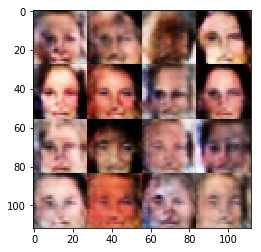

Epoch 1/1... Generator Loss: 1.9567 Discriminator Loss: 0.2840...
Epoch 1/1... Generator Loss: 2.5175 Discriminator Loss: 0.8751...
Epoch 1/1... Generator Loss: 1.9768 Discriminator Loss: 0.3835...
Epoch 1/1... Generator Loss: 2.1854 Discriminator Loss: 0.3255...
Epoch 1/1... Generator Loss: 2.3925 Discriminator Loss: 0.4064...
Epoch 1/1... Generator Loss: 3.3919 Discriminator Loss: 0.2944...
Epoch 1/1... Generator Loss: 3.1506 Discriminator Loss: 0.1891...
Epoch 1/1... Generator Loss: 2.6622 Discriminator Loss: 0.3872...
Epoch 1/1... Generator Loss: 3.1057 Discriminator Loss: 0.2221...
Epoch 1/1... Generator Loss: 3.1213 Discriminator Loss: 0.1466...


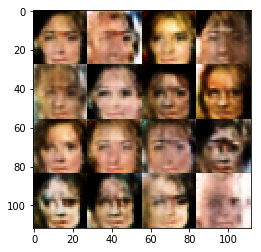

Epoch 1/1... Generator Loss: 7.0069 Discriminator Loss: 2.2936...
Epoch 1/1... Generator Loss: 2.8231 Discriminator Loss: 0.4628...
Epoch 1/1... Generator Loss: 1.0940 Discriminator Loss: 0.7348...
Epoch 1/1... Generator Loss: 2.3095 Discriminator Loss: 0.2973...
Epoch 1/1... Generator Loss: 1.6050 Discriminator Loss: 0.5546...
Epoch 1/1... Generator Loss: 0.9168 Discriminator Loss: 0.7905...
Epoch 1/1... Generator Loss: 1.6252 Discriminator Loss: 0.4018...
Epoch 1/1... Generator Loss: 2.0211 Discriminator Loss: 0.2276...
Epoch 1/1... Generator Loss: 2.2461 Discriminator Loss: 0.3444...
Epoch 1/1... Generator Loss: 2.0030 Discriminator Loss: 0.3108...


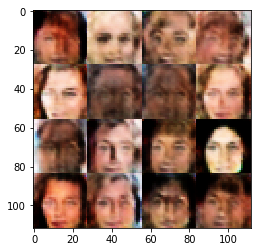

Epoch 1/1... Generator Loss: 5.2050 Discriminator Loss: 0.9271...
Epoch 1/1... Generator Loss: 2.5069 Discriminator Loss: 0.3775...
Epoch 1/1... Generator Loss: 0.1913 Discriminator Loss: 2.1733...
Epoch 1/1... Generator Loss: 2.8031 Discriminator Loss: 0.8522...
Epoch 1/1... Generator Loss: 2.3091 Discriminator Loss: 0.4973...
Epoch 1/1... Generator Loss: 2.6874 Discriminator Loss: 0.2828...
Epoch 1/1... Generator Loss: 2.6388 Discriminator Loss: 0.2549...
Epoch 1/1... Generator Loss: 2.1862 Discriminator Loss: 0.2232...
Epoch 1/1... Generator Loss: 1.8858 Discriminator Loss: 0.5133...
Epoch 1/1... Generator Loss: 3.5294 Discriminator Loss: 0.7137...


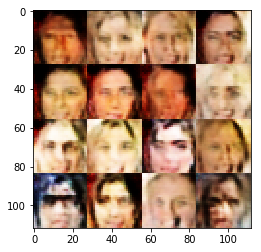

Epoch 1/1... Generator Loss: 1.6617 Discriminator Loss: 0.5813...
Epoch 1/1... Generator Loss: 2.1041 Discriminator Loss: 0.3778...
Epoch 1/1... Generator Loss: 1.8839 Discriminator Loss: 0.5482...
Epoch 1/1... Generator Loss: 1.0628 Discriminator Loss: 0.6825...
Epoch 1/1... Generator Loss: 1.3832 Discriminator Loss: 0.5948...
Epoch 1/1... Generator Loss: 2.5015 Discriminator Loss: 0.1735...
Epoch 1/1... Generator Loss: 1.0458 Discriminator Loss: 0.7944...
Epoch 1/1... Generator Loss: 1.4690 Discriminator Loss: 0.5500...
Epoch 1/1... Generator Loss: 2.6870 Discriminator Loss: 0.8597...
Epoch 1/1... Generator Loss: 1.7729 Discriminator Loss: 0.3689...


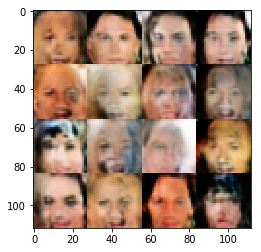

Epoch 1/1... Generator Loss: 0.8885 Discriminator Loss: 0.7710...
Epoch 1/1... Generator Loss: 3.3607 Discriminator Loss: 0.2236...
Epoch 1/1... Generator Loss: 1.3784 Discriminator Loss: 0.6064...
Epoch 1/1... Generator Loss: 1.8701 Discriminator Loss: 0.3455...
Epoch 1/1... Generator Loss: 5.2547 Discriminator Loss: 0.8112...
Epoch 1/1... Generator Loss: 1.8588 Discriminator Loss: 0.5870...
Epoch 1/1... Generator Loss: 1.1668 Discriminator Loss: 0.6214...
Epoch 1/1... Generator Loss: 2.4953 Discriminator Loss: 0.2678...
Epoch 1/1... Generator Loss: 3.1901 Discriminator Loss: 0.1599...
Epoch 1/1... Generator Loss: 2.5553 Discriminator Loss: 0.1483...


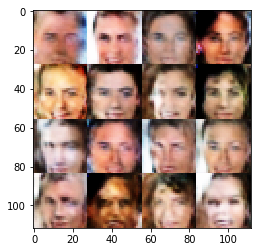

Epoch 1/1... Generator Loss: 2.8591 Discriminator Loss: 0.1362...
Epoch 1/1... Generator Loss: 0.4958 Discriminator Loss: 1.2928...
Epoch 1/1... Generator Loss: 3.3637 Discriminator Loss: 0.3672...
Epoch 1/1... Generator Loss: 1.9510 Discriminator Loss: 0.4773...
Epoch 1/1... Generator Loss: 0.3850 Discriminator Loss: 1.6081...
Epoch 1/1... Generator Loss: 2.2240 Discriminator Loss: 0.3186...
Epoch 1/1... Generator Loss: 1.8957 Discriminator Loss: 0.3820...
Epoch 1/1... Generator Loss: 0.1901 Discriminator Loss: 2.2331...
Epoch 1/1... Generator Loss: 0.1975 Discriminator Loss: 2.1169...
Epoch 1/1... Generator Loss: 5.3545 Discriminator Loss: 1.2929...


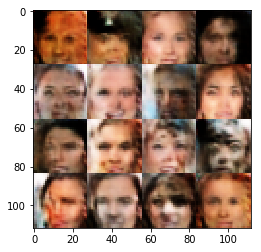

Epoch 1/1... Generator Loss: 0.7927 Discriminator Loss: 0.9315...
Epoch 1/1... Generator Loss: 0.5694 Discriminator Loss: 1.3464...
Epoch 1/1... Generator Loss: 0.9537 Discriminator Loss: 0.7038...
Epoch 1/1... Generator Loss: 1.1476 Discriminator Loss: 0.5754...
Epoch 1/1... Generator Loss: 1.9367 Discriminator Loss: 0.4328...
Epoch 1/1... Generator Loss: 0.1882 Discriminator Loss: 2.2017...
Epoch 1/1... Generator Loss: 4.4284 Discriminator Loss: 1.3511...
Epoch 1/1... Generator Loss: 0.5491 Discriminator Loss: 1.2634...
Epoch 1/1... Generator Loss: 6.1825 Discriminator Loss: 2.2016...
Epoch 1/1... Generator Loss: 0.2156 Discriminator Loss: 2.0412...


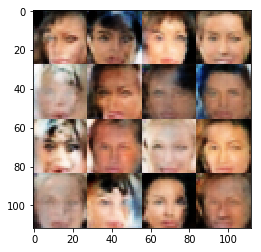

Epoch 1/1... Generator Loss: 2.2738 Discriminator Loss: 0.4497...
Epoch 1/1... Generator Loss: 2.8256 Discriminator Loss: 0.4953...
Epoch 1/1... Generator Loss: 2.3311 Discriminator Loss: 0.3100...
Epoch 1/1... Generator Loss: 4.0786 Discriminator Loss: 0.3719...
Epoch 1/1... Generator Loss: 2.0796 Discriminator Loss: 0.3437...
Epoch 1/1... Generator Loss: 3.4425 Discriminator Loss: 0.7625...
Epoch 1/1... Generator Loss: 2.7002 Discriminator Loss: 0.3405...
Epoch 1/1... Generator Loss: 0.1517 Discriminator Loss: 2.5046...
Epoch 1/1... Generator Loss: 2.8502 Discriminator Loss: 0.3259...
Epoch 1/1... Generator Loss: 0.9012 Discriminator Loss: 0.8212...


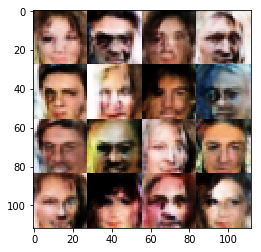

Epoch 1/1... Generator Loss: 2.4859 Discriminator Loss: 0.2006...
Epoch 1/1... Generator Loss: 0.8607 Discriminator Loss: 0.8974...
Epoch 1/1... Generator Loss: 3.5226 Discriminator Loss: 1.3306...
Epoch 1/1... Generator Loss: 1.3396 Discriminator Loss: 0.6204...
Epoch 1/1... Generator Loss: 0.7384 Discriminator Loss: 1.0452...
Epoch 1/1... Generator Loss: 1.0219 Discriminator Loss: 0.7076...
Epoch 1/1... Generator Loss: 0.2207 Discriminator Loss: 2.0886...
Epoch 1/1... Generator Loss: 0.9896 Discriminator Loss: 0.7271...
Epoch 1/1... Generator Loss: 0.8726 Discriminator Loss: 0.9013...
Epoch 1/1... Generator Loss: 0.4351 Discriminator Loss: 1.7745...


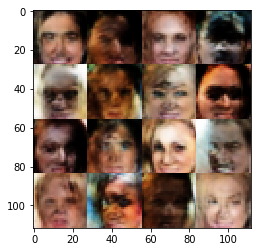

Epoch 1/1... Generator Loss: 3.3396 Discriminator Loss: 0.9407...
Epoch 1/1... Generator Loss: 0.7087 Discriminator Loss: 0.8668...
Epoch 1/1... Generator Loss: 0.5304 Discriminator Loss: 1.3229...
Epoch 1/1... Generator Loss: 1.0490 Discriminator Loss: 0.7510...
Epoch 1/1... Generator Loss: 2.2891 Discriminator Loss: 0.3589...
Epoch 1/1... Generator Loss: 1.3730 Discriminator Loss: 0.5049...
Epoch 1/1... Generator Loss: 4.1343 Discriminator Loss: 0.3901...
Epoch 1/1... Generator Loss: 0.3995 Discriminator Loss: 1.4450...
Epoch 1/1... Generator Loss: 0.2283 Discriminator Loss: 2.0658...
Epoch 1/1... Generator Loss: 1.7205 Discriminator Loss: 0.7427...


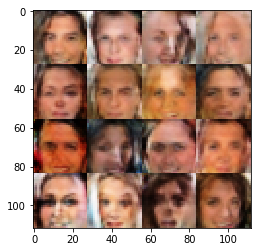

Epoch 1/1... Generator Loss: 0.2741 Discriminator Loss: 1.6511...
Epoch 1/1... Generator Loss: 0.6722 Discriminator Loss: 1.0069...
Epoch 1/1... Generator Loss: 3.9204 Discriminator Loss: 0.2733...
Epoch 1/1... Generator Loss: 1.7487 Discriminator Loss: 0.9259...
Epoch 1/1... Generator Loss: 1.1407 Discriminator Loss: 0.8991...
Epoch 1/1... Generator Loss: 5.7301 Discriminator Loss: 0.7577...
Epoch 1/1... Generator Loss: 1.7431 Discriminator Loss: 0.3994...
Epoch 1/1... Generator Loss: 0.9503 Discriminator Loss: 0.7593...
Epoch 1/1... Generator Loss: 4.0872 Discriminator Loss: 0.0851...
Epoch 1/1... Generator Loss: 2.0355 Discriminator Loss: 0.4538...


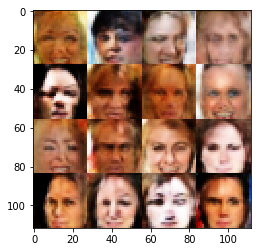

Epoch 1/1... Generator Loss: 1.4987 Discriminator Loss: 0.7127...
Epoch 1/1... Generator Loss: 1.5044 Discriminator Loss: 0.6141...
Epoch 1/1... Generator Loss: 1.2061 Discriminator Loss: 0.7331...
Epoch 1/1... Generator Loss: 1.8842 Discriminator Loss: 0.4767...
Epoch 1/1... Generator Loss: 0.1691 Discriminator Loss: 2.3144...
Epoch 1/1... Generator Loss: 0.4198 Discriminator Loss: 1.4676...
Epoch 1/1... Generator Loss: 1.8339 Discriminator Loss: 0.4680...
Epoch 1/1... Generator Loss: 0.5145 Discriminator Loss: 1.4476...
Epoch 1/1... Generator Loss: 2.7748 Discriminator Loss: 0.5162...
Epoch 1/1... Generator Loss: 0.1941 Discriminator Loss: 2.1954...


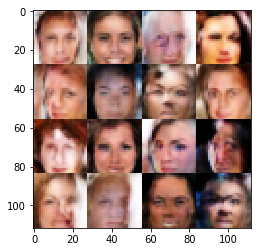

Epoch 1/1... Generator Loss: 0.6417 Discriminator Loss: 1.0701...
Epoch 1/1... Generator Loss: 0.4952 Discriminator Loss: 1.1967...
Epoch 1/1... Generator Loss: 1.3153 Discriminator Loss: 0.5978...
Epoch 1/1... Generator Loss: 3.0366 Discriminator Loss: 0.2082...
Epoch 1/1... Generator Loss: 2.7716 Discriminator Loss: 0.5499...
Epoch 1/1... Generator Loss: 0.2749 Discriminator Loss: 1.9149...
Epoch 1/1... Generator Loss: 2.4815 Discriminator Loss: 0.5323...
Epoch 1/1... Generator Loss: 1.1974 Discriminator Loss: 0.6243...
Epoch 1/1... Generator Loss: 0.5818 Discriminator Loss: 1.1683...
Epoch 1/1... Generator Loss: 0.7743 Discriminator Loss: 1.0026...


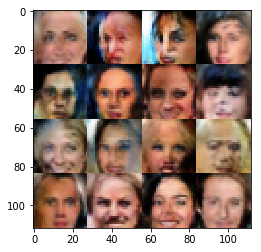

Epoch 1/1... Generator Loss: 0.4770 Discriminator Loss: 1.2453...
Epoch 1/1... Generator Loss: 1.4710 Discriminator Loss: 0.6279...
Epoch 1/1... Generator Loss: 1.7704 Discriminator Loss: 0.5815...
Epoch 1/1... Generator Loss: 1.7775 Discriminator Loss: 0.5216...
Epoch 1/1... Generator Loss: 1.1258 Discriminator Loss: 0.6958...
Epoch 1/1... Generator Loss: 1.2506 Discriminator Loss: 0.5727...
Epoch 1/1... Generator Loss: 0.8925 Discriminator Loss: 0.8520...
Epoch 1/1... Generator Loss: 0.1042 Discriminator Loss: 3.1267...
Epoch 1/1... Generator Loss: 0.6559 Discriminator Loss: 0.9887...
Epoch 1/1... Generator Loss: 4.2460 Discriminator Loss: 0.2846...


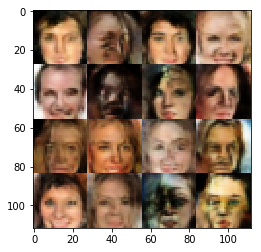

Epoch 1/1... Generator Loss: 1.0823 Discriminator Loss: 0.7335...
Epoch 1/1... Generator Loss: 5.5765 Discriminator Loss: 1.1406...
Epoch 1/1... Generator Loss: 1.6559 Discriminator Loss: 0.5076...
Epoch 1/1... Generator Loss: 1.4640 Discriminator Loss: 0.4897...
Epoch 1/1... Generator Loss: 3.2437 Discriminator Loss: 0.8986...
Epoch 1/1... Generator Loss: 2.9176 Discriminator Loss: 0.9975...
Epoch 1/1... Generator Loss: 0.9971 Discriminator Loss: 0.7169...
Epoch 1/1... Generator Loss: 1.1167 Discriminator Loss: 0.7209...
Epoch 1/1... Generator Loss: 0.7331 Discriminator Loss: 1.1172...
Epoch 1/1... Generator Loss: 4.0937 Discriminator Loss: 0.6420...


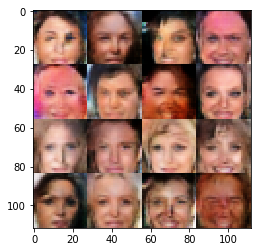

Epoch 1/1... Generator Loss: 1.9235 Discriminator Loss: 0.5529...
Epoch 1/1... Generator Loss: 1.5370 Discriminator Loss: 0.4918...
Epoch 1/1... Generator Loss: 1.9129 Discriminator Loss: 0.4678...
Epoch 1/1... Generator Loss: 1.5575 Discriminator Loss: 0.5851...
Epoch 1/1... Generator Loss: 1.0724 Discriminator Loss: 0.8119...
Epoch 1/1... Generator Loss: 3.8948 Discriminator Loss: 0.1872...


In [16]:
batch_size = 64
z_dim = 100
learning_rate = .0002
beta1 = .5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.